<a href="https://colab.research.google.com/github/swetasinha1410/sweta-raj-sinha/blob/main/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Forecasting**

Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

**Some Use Cases**

To predict the number of incoming or churning customers.

To explaining seasonal patterns in sales.

To detect unusual events and estimate the magnitude of their effect.

To Estimate the effect of a newly launched product on number of sold units.

**How to Create an ARIMA Model for Time Series Forecasting in Python**

A popular and widely used statistical method for time series forecasting is the ARIMA model.


ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

After completing this tutorial, you will know:

About the ARIMA model the parameters used and assumptions made by the model.
How to fit an ARIMA model to data and use it to make forecasts.
How to configure the ARIMA model on your time series problem.

**Autoregressive Integrated Moving Average Model**

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

**AR:** Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

**I:** Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA:** Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Each of these components are explicitly specified in the model as a parameter.


 **A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.**

**The parameters of the ARIMA model are defined as follows:**

**p**: The number of lag observations included in the model, also called the lag order.

**d** : The number of times that the raw observations are differenced, also called the degree of differencing.

**q**: The size of the moving average window, also called the order of moving average.

#A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.#

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

Next, let’s take a look at how we can use the ARIMA model in Python. We will start with loading a simple univariate time series.

**Types of ARIMA Model**

ARIMA:Non-seasonal Autoregressive Integrated Moving Averages

SARIMA:Seasonal ARIMA

SARIMAX:Seasonal ARIMA with exogenous variables

**Load Libraries**

In [ ]:
# To install the library
pip install pmdarima

# Import the library
from pmdarima import auto_arima


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

**Code : Parameter Analysis for the ARIMA model**

In [ ]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['# Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

In [ ]:
# To print the summary
stepwise_fit.summary()

**Predictions of ARIMA Model against the test set**

In [ ]:
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['# Passengers'].plot(legend = True)

**Code : Evaluate the model using MSE and RMSE**

In [ ]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["# Passengers"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["# Passengers"], predictions)

**Code : Forecast using ARIMA Model**

In [ ]:
 Train the model on the full dataset
model = model = SARIMAX(airline['# Passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
airline['# Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

Code used in practice

In [ ]:
dataset = pd.read_csv(path)
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head(5)

**From the plot below, we can see that there is a Trend compoenent in th series. Hence, we now check for stationarity of the data**

In [ ]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

1. Introduction to Time Series Forecasting 
Table of Contents

A Time Series is defined as a series of data points recorded at different time intervals. The time order can be daily, monthly, or even yearly.

Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.



Forecasting is the step where we want to predict the future values the series is going to take. Forecasting a time series is often of tremendous commercial value.

**Forecasting a time series can be broadly divided into two types.***

If we use only the previous values of the time series to predict its future values, it is called Univariate Time Series Forecasting.  

If we use predictors other than the series (like exogenous variables) to forecast it is called Multi Variate Time Series Forecasting.

This notebook focuses on a particular type of forecasting method called ARIMA modeling.

2. **Introduction to ARIMA Models **

Table of Contents

ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA Models are specified by three order parameters: (p, d, q),

where,

**p is the order of the AR term**

**q is the order of the MA term**

d is the number of differencing required to make the time series stationary **bold text**

**AR(p)** Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. 

An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

**I(d)** Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. 

Differencing involves the subtraction of the current values of a series with its previous values d number of times.


**MA(q)** Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. 
A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

**Types of ARIMA Model**

ARIMA : Non-seasonal Autoregressive Integrated Moving Averages

SARIMA : Seasonal ARIMA

SARIMAX : Seasonal ARIMA with exogenous variables

If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.


**3. The meaning of p, d and q in ARIMA model**

**3.1 The meaning of p**
p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.

**3.2 The meaning of d**


The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. **Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other**. So we need to make the time series stationary.

The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.

**3.3 The meaning of q**

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

**4. AR and MA models**

**4.1 AR model**
An Auto Regressive (AR) model is one where Yt depends only on its own lags.

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1



where,

Yt−1  is the lag1 of the series,

β1  is the coefficient of lag1 that the model estimates, and

α  is the intercept term, also estimated by the model.

**4.2 MA model**
Likewise a Moving Average (MA) model is one where Yt depends only on the lagged forecast errors. It is depicted by the following equation -

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1

5. How to find the order of differencing (d) in ARIMA model 
Table of Contents

As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.

So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.
If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.
Now, we will explain these concepts with the help of an example as follows:-

First, I will check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

**The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.**

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [3]:
import pandas as pd
import numpy as np

In [19]:
path = '/kaggle/input/dataset/dataset.txt'

df = pd.read_csv('/content/Text.csv')

df.head()

,date,value
0,01-07-1991,3.526591
1,01-08-1991,3.180891
2,01-09-1991,3.252221
3,01-10-1991,3.611003
4,01-11-1991,3.565860


In [13]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.268497
p-value: 0.643459


Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

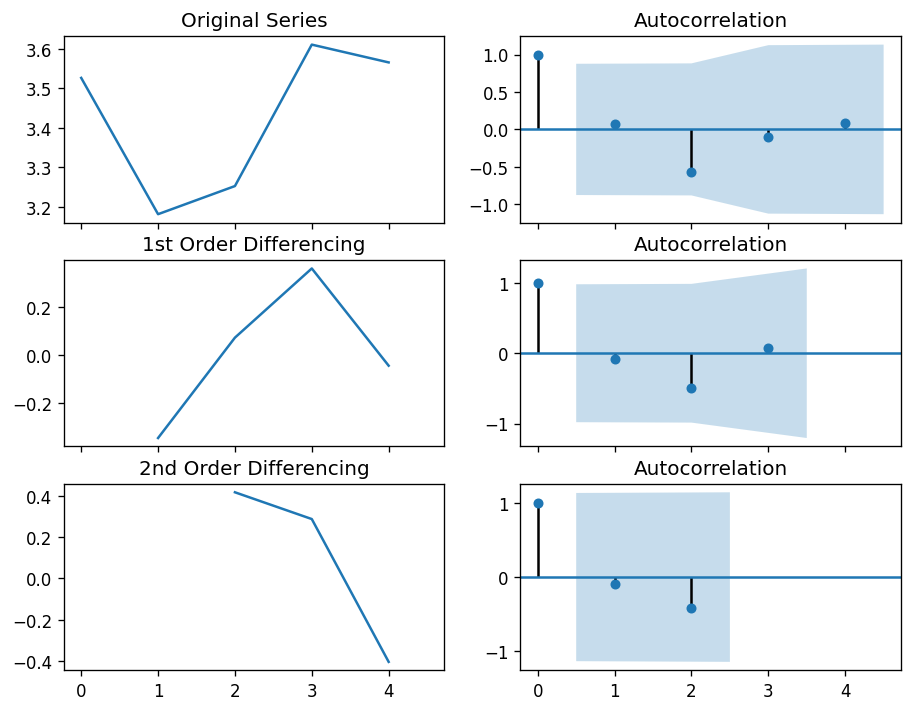

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()